In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium 


In [2]:
file = 'Crimes_MASTER_2018.csv'

In [3]:
crime_pd = pd.read_csv(file)
crime_pd.head()

,ID,Date,IUCR,Primary Type,Description,Location Description,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude
0,11240493,2/24/2018 16:38,560,ASSAULT,SIMPLE,DEPARTMENT STORE,08A,NaN,NaN,2018,NaN,NaN
1,11481085,8/26/2018 9:25,2014,NARCOTICS,MANU/DELIVER: HEROIN (WHITE),OTHER,18,NaN,NaN,2018,NaN,NaN
2,11222171,2/3/2018 9:00,281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOSPITAL BUILDING/GROUNDS,2,NaN,NaN,2018,NaN,NaN
3,11429781,7/17/2018 12:58,2027,NARCOTICS,POSS: CRACK,RESIDENCE,18,NaN,NaN,2018,NaN,NaN
4,11429759,7/8/2018 8:41,2027,NARCOTICS,POSS: CRACK,APARTMENT,18,NaN,NaN,2018,NaN,NaN


In [37]:
crime_1 = crime_pd['Location Description'].value_counts()
#crime_1

In [5]:
# create a seaborn count plot to show me were it crime mostly happen 

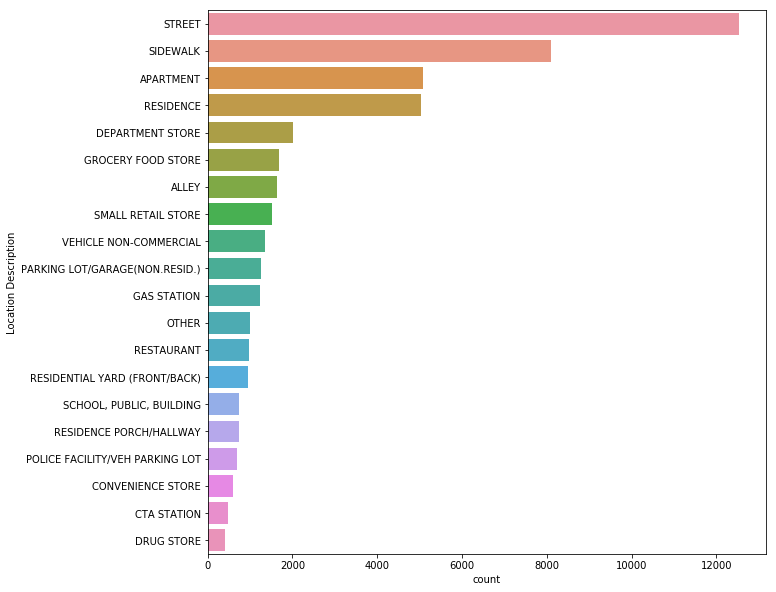

In [6]:
plt.figure(figsize=(10,10))
sns.countplot(y='Location Description', data=crime_pd, order = crime_pd['Location Description'].value_counts().iloc[:20].index)


In [7]:
# the type of crime 

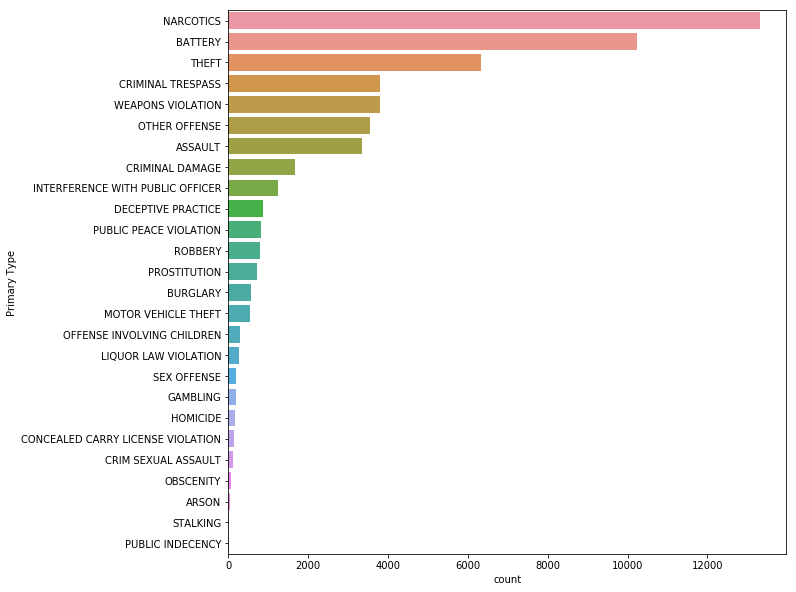

In [8]:
plt.figure(figsize=(10,10))
sns.countplot(y='Primary Type',  data=crime_pd, order = crime_pd['Primary Type'].value_counts().iloc[:26].index)


In [9]:
# change the date column into pd.datetime
crime_pd['Date'] = crime_pd['Date'].map(pd.to_datetime)

In [10]:
crime_pd.head()

,ID,Date,IUCR,Primary Type,Description,Location Description,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude
0,11240493,2018-02-24 16:38:00,560,ASSAULT,SIMPLE,DEPARTMENT STORE,08A,NaN,NaN,2018,NaN,NaN
1,11481085,2018-08-26 09:25:00,2014,NARCOTICS,MANU/DELIVER: HEROIN (WHITE),OTHER,18,NaN,NaN,2018,NaN,NaN
2,11222171,2018-02-03 09:00:00,281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOSPITAL BUILDING/GROUNDS,2,NaN,NaN,2018,NaN,NaN
3,11429781,2018-07-17 12:58:00,2027,NARCOTICS,POSS: CRACK,RESIDENCE,18,NaN,NaN,2018,NaN,NaN
4,11429759,2018-07-08 08:41:00,2027,NARCOTICS,POSS: CRACK,APARTMENT,18,NaN,NaN,2018,NaN,NaN


In [11]:
# create a new column with month only 
def get_month(dt):
    return dt.month
crime_pd['Month'] = crime_pd['Date'].map(get_month)

In [12]:
crime_pd.head()

,ID,Date,IUCR,Primary Type,Description,Location Description,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Month
0,11240493,2018-02-24 16:38:00,560,ASSAULT,SIMPLE,DEPARTMENT STORE,08A,NaN,NaN,2018,NaN,NaN,2
1,11481085,2018-08-26 09:25:00,2014,NARCOTICS,MANU/DELIVER: HEROIN (WHITE),OTHER,18,NaN,NaN,2018,NaN,NaN,8
2,11222171,2018-02-03 09:00:00,281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOSPITAL BUILDING/GROUNDS,2,NaN,NaN,2018,NaN,NaN,2
3,11429781,2018-07-17 12:58:00,2027,NARCOTICS,POSS: CRACK,RESIDENCE,18,NaN,NaN,2018,NaN,NaN,7
4,11429759,2018-07-08 08:41:00,2027,NARCOTICS,POSS: CRACK,APARTMENT,18,NaN,NaN,2018,NaN,NaN,7


In [13]:
# create an histogram to show the crime 
crime_grp = crime_pd.groupby(['Month'])

In [14]:
crime_df = crime_grp['Primary Type'].value_counts()

In [15]:
univals = crime_pd['Primary Type'].unique()
univals

array(['ASSAULT', 'NARCOTICS', 'CRIM SEXUAL ASSAULT', 'BURGLARY',
       'SEX OFFENSE', 'CONCEALED CARRY LICENSE VIOLATION', 'BATTERY',
       'CRIMINAL TRESPASS', 'CRIMINAL DAMAGE', 'WEAPONS VIOLATION',
       'OFFENSE INVOLVING CHILDREN', 'MOTOR VEHICLE THEFT',
       'DECEPTIVE PRACTICE', 'THEFT', 'LIQUOR LAW VIOLATION',
       'PROSTITUTION', 'OTHER OFFENSE', 'PUBLIC PEACE VIOLATION',
       'HOMICIDE', 'ROBBERY', 'OBSCENITY', 'ARSON',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'GAMBLING',
       'KIDNAPPING', 'STALKING', 'HUMAN TRAFFICKING', 'PUBLIC INDECENCY',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON-CRIMINAL'], dtype=object)

In [16]:
def count_rows(rows):
    return len(rows)
month_count = crime_pd.groupby('Month').apply(count_rows)

''

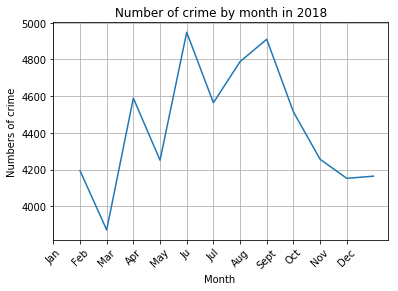

In [17]:
plt.plot(month_count)
plt.xticks(range(12),'Jan Feb Mar Apr May Ju Jul Aug Sept Oct Nov Dec'.split(), rotation=45)
plt.grid()
plt.title('Number of crime by month in 2018')
plt.xlabel('Month ')
plt.ylabel('Numbers of crime')
;

In [18]:
#crime_grp = crime_pd.groupby(['Month'])
#crime_unique = crime_grp['Primary Type'].unique()
#crime_count = crime_unique[].value_counts()


In [19]:
# read the file csv crimes 2001 - present to get the longitude
file2 = 'Crimes_-_2018_2.csv'
crime_pd2 = pd.read_csv(file2)
crime_pd2.head()
    

,Date,Block,IUCR,Crime Category,Crime Type,Crime Details,Crime Location,Suspect Arrested,Domestic Situation,Community Area,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Zip Codes
0,12/31/2018 23:59,112XX S SACRAMENTO AVE,1320,PETTY CRIMES,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,74.0,1158309.0,1829936.0,2018,1/10/2019 15:16,41.689079,-87.696064,"(41.689078832, -87.696064026)","4,447"
1,12/31/2018 23:59,013XX W 72ND ST,1153,PETTY CRIMES,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,67.0,1168573.0,1857018.0,2018,1/17/2019 14:26,41.763181,-87.657709,"(41.763181359, -87.657709477)","22,257"
2,12/31/2018 23:57,084XX S SANGAMON ST,1310,PETTY CRIMES,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,71.0,1171454.0,1848783.0,2018,1/10/2019 15:16,41.740521,-87.647391,"(41.740520866, -87.647390719)","21,554"
3,12/31/2018 23:56,018XX S ALLPORT ST,440,MAJOR CRIMES,BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,OTHER,True,False,31.0,1168327.0,1891230.0,2018,1/10/2019 15:16,41.857068,-87.657625,"(41.857068095, -87.657625201)","14,920"
4,12/31/2018 23:55,078XX S SANGAMON ST,486,MAJOR CRIMES,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,False,71.0,1171332.0,1852934.0,2018,1/10/2019 15:16,41.751914,-87.647717,"(41.75191443, -87.647716532)","21,554"


In [20]:
crime_pd2.head()

,Date,Block,IUCR,Crime Category,Crime Type,Crime Details,Crime Location,Suspect Arrested,Domestic Situation,Community Area,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Zip Codes
0,12/31/2018 23:59,112XX S SACRAMENTO AVE,1320,PETTY CRIMES,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,74.0,1158309.0,1829936.0,2018,1/10/2019 15:16,41.689079,-87.696064,"(41.689078832, -87.696064026)","4,447"
1,12/31/2018 23:59,013XX W 72ND ST,1153,PETTY CRIMES,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,67.0,1168573.0,1857018.0,2018,1/17/2019 14:26,41.763181,-87.657709,"(41.763181359, -87.657709477)","22,257"
2,12/31/2018 23:57,084XX S SANGAMON ST,1310,PETTY CRIMES,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,71.0,1171454.0,1848783.0,2018,1/10/2019 15:16,41.740521,-87.647391,"(41.740520866, -87.647390719)","21,554"
3,12/31/2018 23:56,018XX S ALLPORT ST,440,MAJOR CRIMES,BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,OTHER,True,False,31.0,1168327.0,1891230.0,2018,1/10/2019 15:16,41.857068,-87.657625,"(41.857068095, -87.657625201)","14,920"
4,12/31/2018 23:55,078XX S SANGAMON ST,486,MAJOR CRIMES,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,False,71.0,1171332.0,1852934.0,2018,1/10/2019 15:16,41.751914,-87.647717,"(41.75191443, -87.647716532)","21,554"


In [21]:
crime_pd2['Date'] = crime_pd2['Date'].map(pd.to_datetime)

In [22]:
def get_year(dt):
    return dt.year
crime_pd2['Year'] = crime_pd['Date'].map(get_year)

In [23]:
#crime_pd2.head()

In [24]:
crime_pd3 = crime_pd2.loc[crime_pd2['Year'] == 2018, :]
crime_pd3.head()

,Date,Block,IUCR,Crime Category,Crime Type,Crime Details,Crime Location,Suspect Arrested,Domestic Situation,Community Area,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Zip Codes
0,2018-12-31 23:59:00,112XX S SACRAMENTO AVE,1320,PETTY CRIMES,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,74.0,1158309.0,1829936.0,2018.0,1/10/2019 15:16,41.689079,-87.696064,"(41.689078832, -87.696064026)","4,447"
1,2018-12-31 23:59:00,013XX W 72ND ST,1153,PETTY CRIMES,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,67.0,1168573.0,1857018.0,2018.0,1/17/2019 14:26,41.763181,-87.657709,"(41.763181359, -87.657709477)","22,257"
2,2018-12-31 23:57:00,084XX S SANGAMON ST,1310,PETTY CRIMES,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,71.0,1171454.0,1848783.0,2018.0,1/10/2019 15:16,41.740521,-87.647391,"(41.740520866, -87.647390719)","21,554"
3,2018-12-31 23:56:00,018XX S ALLPORT ST,440,MAJOR CRIMES,BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,OTHER,True,False,31.0,1168327.0,1891230.0,2018.0,1/10/2019 15:16,41.857068,-87.657625,"(41.857068095, -87.657625201)","14,920"
4,2018-12-31 23:55:00,078XX S SANGAMON ST,486,MAJOR CRIMES,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,False,71.0,1171332.0,1852934.0,2018.0,1/10/2019 15:16,41.751914,-87.647717,"(41.75191443, -87.647716532)","21,554"


In [25]:

#crime_pd3['ValueCount'] = crime_pd3['Location'].value_counts()
#crime_pd3['ValueCount'] = crime_pd3['ValueCount'].fillna(0)

In [26]:
#crime_pd3.tail()

In [27]:
map_crime =  folium.Map(location=[41.864073, -87.706819], zoom_start=11, tiles='CartoDB dark_matter')
crime_pd3['Latitude'] = crime_pd3['Latitude'].fillna(0)
crime_pd3['Longitude'] = crime_pd3['Longitude'].fillna(0)
#crime_pd3['Location'] = crime_pd3['Location'].astype(float)
for i in range(500):
    lat = crime_pd3['Latitude'].iloc[i]
    long = crime_pd3['Longitude'].iloc[i]
    popup_text= """" Community Index: {}<br>
                Block: {} <br>
                Crime Description: {} <br>"""
                
    popup_text = popup_text.format(i, crime_pd3['Block'][i], crime_pd3['Crime Type'][i])
    folium.CircleMarker(location=[lat,long], popup=popup_text, fill=True).add_to(map_crime)
    
map_crime

C:\Users\linak\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\linak\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
map_crime.save('folium_map')

# count the crime in the same location


In [36]:
#crime_pd3.dtypes
#crime_pd3['Latitude']

In [31]:
#crime_pd3['Location'] = crime_pd3['Location'].astype(float)
#crime_pd3['Location'].replace( '[()]','-', ('')).astype(float)
crime_count = []
for i in range(0,len(crime_pd3['Latitude'])):
    x = crime_pd3['Location'][i]['Latitude'] + "," + crime_pd3['Location'][i]['Longitude']
    crime_count.append(x)
# convert array into index
locat = pd.Index(crime_count)
# count unique location
unique_location = locat.value_counts()

TypeError: string indices must be integers

In [35]:
unique = crime_pd3['Location'].nunique()
unique

51738